# <center><font face='comic sans ms'> Salary Prediction</font></center>

<b>Problem on Hand: </b> Given a data set which  captures gross salary from July 1, 2013 through June 30, 2014 and includes only those employees who were employed on June 30, 2014 Predict the Salaries for Employees in Blatimore</b>

# Outline
1. Import Datasets
2. Data Cleaning and Data Preparation
3. Exploratory Data Analysis 
4. Feature Engineering
5. Train Test Split
6. Model Building
7. Model Evaluation

In [ ]:
# Import Libraries for Analysis
import numpy as np
import pandas as pd

# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for train test split
from sklearn.model_selection import train_test_split

# import Ilbrary for Scaling
from sklearn.preprocessing import StandardScaler

# import Ilbrary for Model Building
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## <font face='Cursive'> Importing the data set </font>

<b> The data set is in csv format and can be imported using [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method available in pandas library. Since this is original copy giving it a relevent name when importing. <br><br> </b>

Also we will be checking whether the data set is correctly imported by checking the top5 rows of data set

In [ ]:
# Import the data set
salary_org = pd.read_csv("/content/train.csv")

# Print top 5 rows of dataset
salary_org.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


## <font face='Cursive'> Data Cleaning and Preparation</font>

In [ ]:
# Check the info of data set
salary_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


 - <font> There are 18981 rows in the data set</font>
 - <font> There are 7 columns in the data set provided</font>
 - <font> All the columns are of type Object.</font>
 

<font> Its always a good practice to work on copy of data set instead of the Original Data set itself. Hence Creating a [copy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) of data set.</font>

In [ ]:
# Create a copy of data set
salary_cpy = salary_org.copy()

In [ ]:
# Check column names
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

<font> Since Name has leading space lets remove it.</font>

In [ ]:
# Remove leading and trailing edges
salary_cpy.columns = salary_cpy.columns.str.strip()

print(salary_cpy.columns.str)

# print coloumns after stripping spaces
print("After Removing leading and trailing spaces ",  salary_cpy.columns)

After Removing leading and trailing spaces  Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')


The first and formost step before we jump into Analysis is Treating Null Values. So let us [Check Null](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) Values.

In [ ]:
# Check Null Values in data set
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

<font> There are null values in HireDate and GrossPay Columns. Let's work on each of them.</font>
<br>
<font> There are 70 null values in HireDate which is less than 1% of values so [dropping those rows](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) .</font>

In [ ]:
# Remove rows having empty hire date
salary_cpy = salary_cpy.dropna(subset=['HireDate'])

# Check null Values
print(salary_cpy.isnull().sum())

print(salary_cpy.info())

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          18911 non-null  object
 1   JobTitle      18911 non-null  object
 2   AgencyID      18911 non-null  object
 3   Agency        18911 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18911 non-null  object
 6   GrossPay      15688 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB
None


<font> There are no null values in HireDate Column.Moving on to GrossPay.</font><br>
<font> Gross Pay is dependent on Annual salary. So these two are interrelated and only one of this can be used as dependent variable. As we have null values in GrossPay , [dropping that column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)</font>

In [ ]:
# Drop Gross Pay column
salary_cpy=salary_cpy.drop('GrossPay',axis=1)

# Check null Values
salary_cpy.isnull().sum()

print(salary_cpy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          18911 non-null  object
 1   JobTitle      18911 non-null  object
 2   AgencyID      18911 non-null  object
 3   Agency        18911 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18911 non-null  object
dtypes: object(6)
memory usage: 1.0+ MB
None


<font> Let us check [value counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html) for all columns</font>

In [ ]:
# Value_counts for AgencyID
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02584      1
W02681      1
W02525      1
W02591      1
W02509      1
Name: AgencyID, Length: 1177, dtype: int64

<font>There are 1177 agencies in Blatimore. As per general Understanding AgencyID represents an Agency, so we should have same number of Agencies as well. Lets check the same</font>

In [ ]:
# Value_counts for Agency
salary_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

<font color = ''> Against general expectations, A single Agency seems to have different Agency ID's which might be given based on Job Role and Agency. Let's verify the Same </font>

In [ ]:
# Value_counts for JobTitle
salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                   4817
POLICE OFFICER                   1866
LABORER (Hourly)                  597
EMT Firefighter Suppression       358
CROSSING GUARD                    337
                                 ... 
ELECTRICAL MECHANIC SUPV            1
WWW Chief of Engineering            1
BUILDING REPAIRER SUPV              1
CABINETMAKER II                     1
DEPUTY SHERIFF SUPV (SPECIAL)       1
Name: JobTitle, Length: 1073, dtype: int64

<font color = ''> There are 1073 Job title that are available</font>

In [ ]:
#Value counts on HireDate
salary_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
02/27/1998       1
08/29/1976       1
11/10/2011       1
02/08/2000       1
01/16/1995       1
Name: HireDate, Length: 4737, dtype: int64

 - <font> More number of people are selected on 05/21/2014</font>
 - <font> Date is of format MM/DD/YYYY </font>

In [ ]:
#Value counts on Annual Salary
salary_cpy.AnnualSalary.value_counts()

$11310.00    4811
$20800.00     325
$29245.00     196
$43999.00     169
$44773.00     162
             ... 
$49346.00       1
$41250.00       1
$89400.00       1
$45891.00       1
$80955.00       1
Name: AnnualSalary, Length: 1590, dtype: int64

In [ ]:
sum = lambda a,b: a+b

 - <font color = ''> Annual Salary has a dollar attached to it we will have to remove it and convert it ingto integer format</font>

In [ ]:
# Removing $ from Annual Salary and converting it into Integer format
salary_cpy['AnnualSalary'] = salary_cpy['AnnualSalary'].apply(lambda x : (float)(str(x)[1:]))

In [ ]:
#Value counts on Annual Salary
salary_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
35509.0       1
25945.0       1
51889.0       1
39600.0       1
86400.0       1
Name: AnnualSalary, Length: 1590, dtype: int64

##### <font color = ''> Now that we have modified Salary , lets also break the Date into year ,month and day </font>

In [ ]:
salary_cpy['HireDay'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[3:5])))    # 05/21/2014
salary_cpy['HireMonth'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[0:2])))
salary_cpy['HireYear'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[6:])))

# Print info to check whether columns are added
salary_cpy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18911 non-null  object 
 1   JobTitle      18911 non-null  object 
 2   AgencyID      18911 non-null  object 
 3   Agency        18911 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18911 non-null  float64
 6   HireDay       18911 non-null  int64  
 7   HireMonth     18911 non-null  int64  
 8   HireYear      18911 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


 <font color = ''> Trimming all categorical columns to make sure there are no leading and trailing spaces and no double space between Words </font>

In [ ]:
# Trim spaces
salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x : str(x).strip().replace("  "," "))
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x : str(x).strip().replace("  "," "))
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x : str(x).strip().replace("  "," "))

<font color = ''> It can also be seen that some of the job titles are in Upper case. so with Lower and with mix of both which might effect analysis, so converting them to  uppercase and also converting  Agency and AgencyID</font>

In [ ]:
# Trim spaces
salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x : str(x).upper())
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x : str(x).upper())
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x : str(x).upper())

<font color = ''> The last thing left in Data Preparation is Outlier Treatment. So lerts create [Box plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) for Annual Salary and check for Outliers </font>

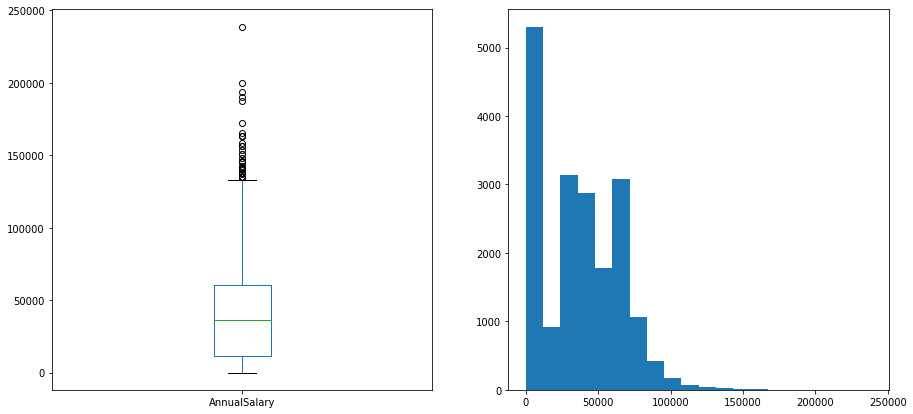

In [ ]:
plt.subplots(figsize=(15,7))

plt.subplot(1,2,1)
salary_cpy['AnnualSalary'].plot.box()

plt.subplot(1,2,2)
plt.hist(salary_cpy['AnnualSalary'], bins=20)

plt.show()

- <font color = ''> There are few Salaries which are way far from other Salaries.</font>
- <font color = ''> They might effect the prediction. So we have to eliminate them</font><br><br>

<font color = ''> Lets Check the Summary Statistics as well </font>

In [ ]:
# SUMMARY STATS OF AnnualSalary
salary_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

As can be seen The max value way more than mean , median .

<font color = ''> Let's delete rows whose annual salary> 1500000 according to box plot</font>

In [ ]:
salary_cpy = salary_cpy[salary_cpy['AnnualSalary']<150000]
salary_cpy.shape


(18895, 9)

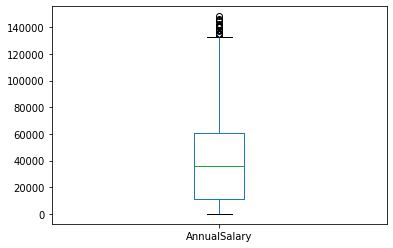

In [ ]:
# Create Box Plot for Annual Salary
salary_cpy.AnnualSalary.plot.box()
plt.show()

All the data points above the 75% line are very close to each other so leaving it as is. <br><br> Now that we are done with Data Preparation lets move to next step

## <font color='' face='Cursive'>Exploratory Data Analysis</font>

<font color=''> We will first check the distribution of of Annual Salary by creating a [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)</font>

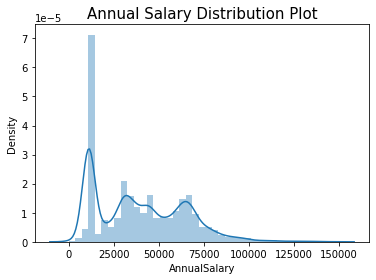

In [ ]:
# Check distribution of Target Variable
sns.distplot(salary_cpy.AnnualSalary)
plt.title("Annual Salary Distribution Plot",fontsize=15)
plt.show()

 - <font color='' face='Calibri'> The data is distributed very randomly and there seems to be not many peopel with salary more than 100000</font>

Let us check jobs for which people are being hired the most. For this we will be creating a [barplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

JobTitle
AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (HOURLY)                   597
CROSSING GUARD                     374
EMT FIREFIGHTER SUPPRESSION        358
                                  ... 
FINGERPRINT TECHNICIAN SUPERVI       1
FIRE APPARATUS OFFICER               1
FIRE CAPTAIN EMS CRT                 1
SENIOR CAPITAL PLANNING ANALYS       1
ZONING EXAMINER II                   1
Name: Name, Length: 1055, dtype: int64


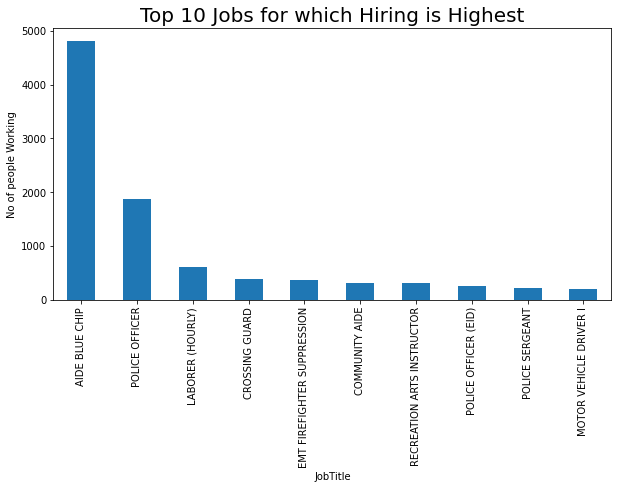

In [ ]:
#Top 10 Jobs that based on hirings
plt.figure(figsize=(10,5))
print(salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False))
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of people Working')
plt.title("Top 10 Jobs for which Hiring is Highest",fontsize=20)
plt.show()

- The above plot clearly shows more number of People are working as AIDE BLUE CHIP which  has over double the workers working as POLICE OFFICER which is second Highest
- All the remaining JobTitles have less than 1000 Workers 

<font color=''> Let us check the top 10 Jobs that fetch highest Salary </font>

JobTitle
FIRE COMMAND STAFF III        140885.000000
EXECUTIVE LEVEL III           138400.000000
FIRE COMMAND STAFF II         129587.000000
WWW CHIEF OF ENGINEERING      127296.000000
PUBLIC HEALTH PHYSICIAN II    125300.000000
                                  ...      
JTPA TRAINEE A MOMR             6240.000000
SR COMPANION STIPEND HLTH       4908.129032
JUDGE'S WIDOW                   3191.666667
MISCELLANEOUS                   2484.000000
COMMITTEE CLERK CC              2000.000000
Name: AnnualSalary, Length: 1055, dtype: float64


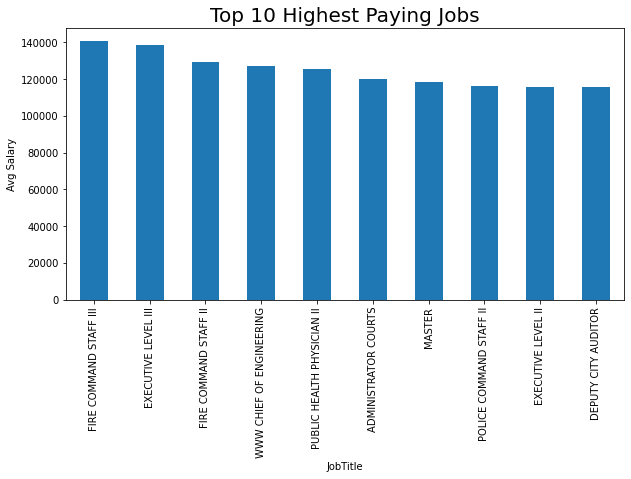

In [ ]:
#Top 10 Jobs that fetche highest Salary
plt.figure(figsize=(10,5))
print(salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Avg Salary')
plt.title("Top 10 Highest Paying Jobs",fontsize=20)
plt.show()

 - The above plot clearly shows top 10 Jobs which fetch the highest Salary.

<font color=''> Number of Jobs whose average pay is more thatn total average salary</font>

In [ ]:
# Find mean Salary
mean_sal = salary_cpy.AnnualSalary.mean()

# Number of Jobs paying more than mean salary
print(salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean())
print(salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index())
good_pay_jobs = salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_pay_jobs[good_pay_jobs.AnnualSalary>mean_sal]['JobTitle']

JobTitle
911 LEAD OPERATOR              47886.000000
911 OPERATOR                   42835.743590
911 OPERATOR SUPERVISOR        54797.500000
ACCOUNT EXECUTIVE              42960.000000
ACCOUNTANT I                   46316.642857
                                   ...     
ZONING ADMINISTRATOR           82100.000000
ZONING APPEALS ADVISOR BMZA    59274.000000
ZONING ENFORCEMENT OFFICER     62000.000000
ZONING EXAMINER I              43674.000000
ZONING EXAMINER II             53568.000000
Name: AnnualSalary, Length: 1055, dtype: float64
                         JobTitle  AnnualSalary
0               911 LEAD OPERATOR  47886.000000
1                    911 OPERATOR  42835.743590
2         911 OPERATOR SUPERVISOR  54797.500000
3               ACCOUNT EXECUTIVE  42960.000000
4                    ACCOUNTANT I  46316.642857
...                           ...           ...
1050         ZONING ADMINISTRATOR  82100.000000
1051  ZONING APPEALS ADVISOR BMZA  59274.000000
1052   ZONING ENFORCEMENT 

0                 911 LEAD OPERATOR
1                      911 OPERATOR
2           911 OPERATOR SUPERVISOR
3                 ACCOUNT EXECUTIVE
4                      ACCOUNTANT I
                   ...             
1050           ZONING ADMINISTRATOR
1051    ZONING APPEALS ADVISOR BMZA
1052     ZONING ENFORCEMENT OFFICER
1053              ZONING EXAMINER I
1054             ZONING EXAMINER II
Name: JobTitle, Length: 798, dtype: object

- Out of 1073 Jobs 798 Jobs pay more than total average Salary

<font color=''> Let us check the top 10 Agencies and AgencyID with highest number of employees </font>

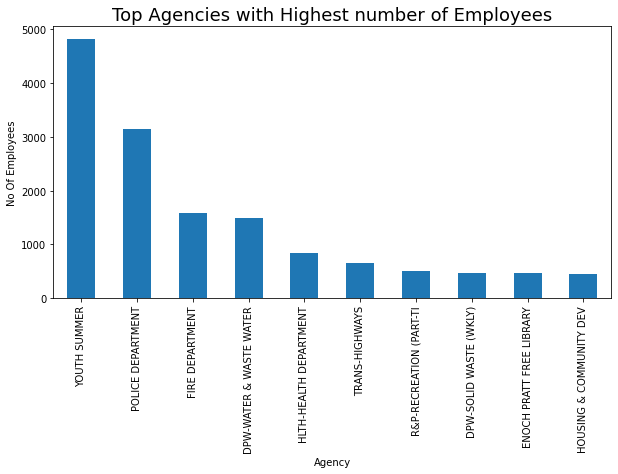

In [ ]:
#Top 10 Agencies that has highest number of employees
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No Of Employees')
plt.title("Top Agencies with Highest number of Employees",fontsize=18)
plt.show()

 - The Youth Summer has maximum number of employees followed by Police Department
 - Fire Department and DPW - Water & Waste Water has almost same number of employees

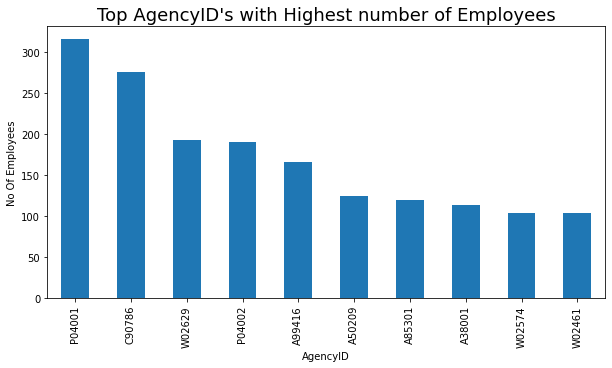

In [ ]:
#Top 10 Jobs that has highest number of employees
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No Of Employees')
plt.title("Top AgencyID's with Highest number of Employees",fontsize=18)
plt.show()

 - The P04001 has maximum number of employees followed by C90786

<font color = '' > Let us check people hired in which year have lowest Salaries. This is to check if as the Hire Year increases the Salary decreases. Because, Salary is high for people who have high experience </font>

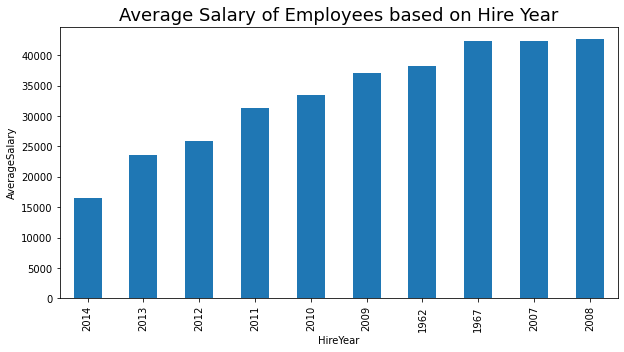

In [ ]:
# Salary vs Hire Year
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel('AverageSalary')
plt.title("Average Salary of Employees based on Hire Year",fontsize=18)
plt.show()

 - The trend above Suggests that the Salary of the employees increases with experience in the company. So now lets calculate experience in days with Agency.

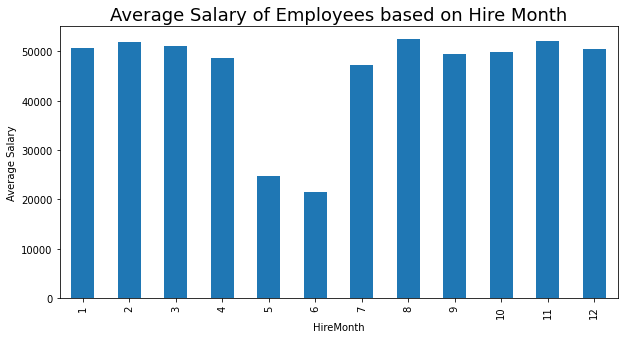

In [ ]:
# Checking if Month hired has any such effect
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.ylabel('Average Salary')
plt.title("Average Salary of Employees based on Hire Month",fontsize=18)
plt.show()

- Except in Months 5 and 6 the distribution is same throughout.
- This might be because big agencies donot hire during that time

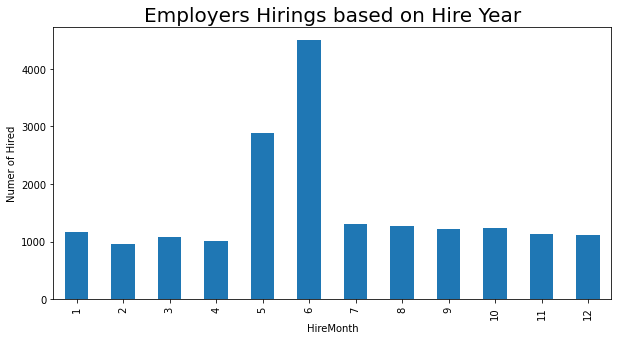

In [ ]:
# Checking on which Month most people are hired
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.ylabel('Numer of Hired')
plt.title("Employers Hirings based on Hire Year",fontsize=20)
plt.show()

 -  More members are being hired in months of May and June but they have relatively lower average salaries

##### <font color = ''> Lets check if there is any relation between any of the Numerical variables using [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html)</font>

<Figure size 1080x1440 with 0 Axes>

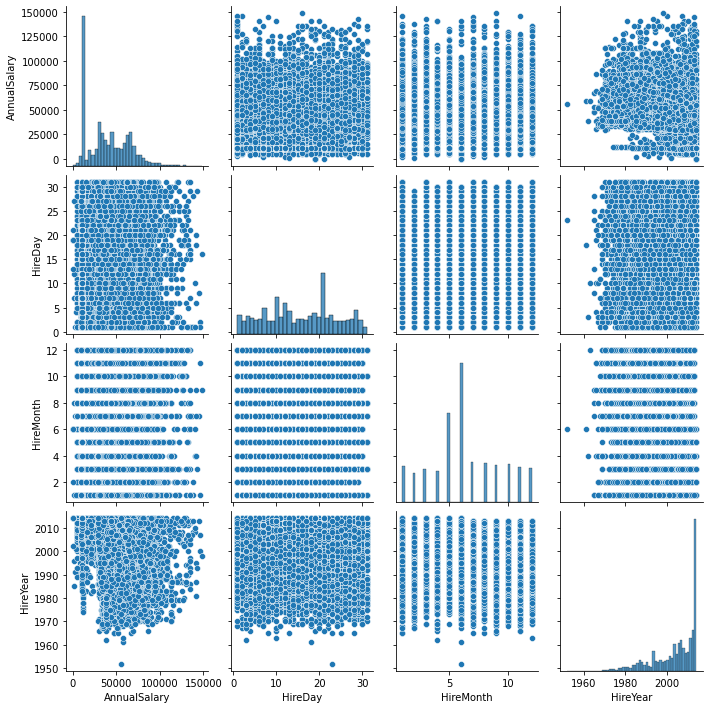

In [ ]:
# Plot a pair plot
plt.figure(figsize=(15,20))
sns.pairplot(salary_cpy)
plt.show()

Nothing seems to have any [correlation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). Lets visualize correlation coefficients using [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

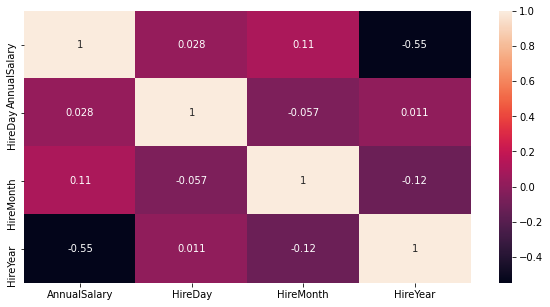

In [ ]:
# Plot a heatMap
plt.figure(figsize=(10,5))
sns.heatmap(salary_cpy.corr(),annot=True)

Except for HireYear nothing seems to have significant correlation with Annual Salary

## <font color='' face='Cursive'> Feature Engineering</font>

Let us create a copy of data frame to do model building

In [ ]:
# Create a copy od data frame
salary_master = salary_cpy.copy()

 &nbsp; <font color='' face='cursive'> Linear Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called [feature encoding](https://medium.com/analytics-vidhya/different-type-of-feature-engineering-encoding-techniques-for-categorical-variable-encoding-214363a016fb). </font>
 

   <font color='' face='cursive'>Here We will be using Mean encoding. We are using Mean encoding as the number of labels of categorical variables are very high and so using others might either create unnecessary variables or labelling might not be that appropriate.</font>

In [ ]:
# Apply mean encoding for Job Title
mean_Job = salary_master.groupby('JobTitle')['AnnualSalary'].mean()
print(mean_Job)
salary_master['JobTitle'] = salary_master['JobTitle'].map(mean_Job)

print(salary_master['JobTitle'])

JobTitle
911 LEAD OPERATOR              47886.000000
911 OPERATOR                   42835.743590
911 OPERATOR SUPERVISOR        54797.500000
ACCOUNT EXECUTIVE              42960.000000
ACCOUNTANT I                   46316.642857
                                   ...     
ZONING ADMINISTRATOR           82100.000000
ZONING APPEALS ADVISOR BMZA    59274.000000
ZONING ENFORCEMENT OFFICER     62000.000000
ZONING EXAMINER I              43674.000000
ZONING EXAMINER II             53568.000000
Name: AnnualSalary, Length: 1055, dtype: float64
0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18895, dtype: float64


In [ ]:
# Apply mean encoding for Agency
mean_agency = salary_master.groupby('Agency')['AnnualSalary'].mean()
salary_master['Agency'] = salary_master['Agency'].map(mean_agency)

print(salary_master['Agency'])

0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61506.879579
             ...     
18976    11313.967200
18977    11313.967200
18978    61506.879579
18979    61506.879579
18980    42565.513078
Name: Agency, Length: 18895, dtype: float64


In [ ]:
# Apply mean encoding for AgencyID
mean_agencyID = salary_master.groupby('AgencyID')['AnnualSalary'].mean()
salary_master['AgencyID'] = salary_master['AgencyID'].map(mean_agencyID)

print(salary_master['AgencyID'])

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18895, dtype: float64


We have converted all the required categorical variables to Numerical variables. Lets check the info to check if trhere are any non-numeric variables

In [ ]:
# Check info
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18895 non-null  object 
 1   JobTitle      18895 non-null  float64
 2   AgencyID      18895 non-null  float64
 3   Agency        18895 non-null  float64
 4   HireDate      18895 non-null  object 
 5   AnnualSalary  18895 non-null  float64
 6   HireDay       18895 non-null  int64  
 7   HireMonth     18895 non-null  int64  
 8   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


 - <font color='' face='cursive'> Since we have HireYear, HireMonth and HireDay , we no longer require Date field</font>
 - <font color='' face='cursive'> And Annual Income is never based on Name, so it is safe to remove both those columns</font>

In [ ]:
# Drop Name, HireDate column
salary_master = salary_master.drop(['HireDate','Name'],axis=1)

# Check Info
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18895 non-null  float64
 1   AgencyID      18895 non-null  float64
 2   Agency        18895 non-null  float64
 3   AnnualSalary  18895 non-null  float64
 4   HireDay       18895 non-null  int64  
 5   HireMonth     18895 non-null  int64  
 6   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


<Figure size 1800x1440 with 0 Axes>

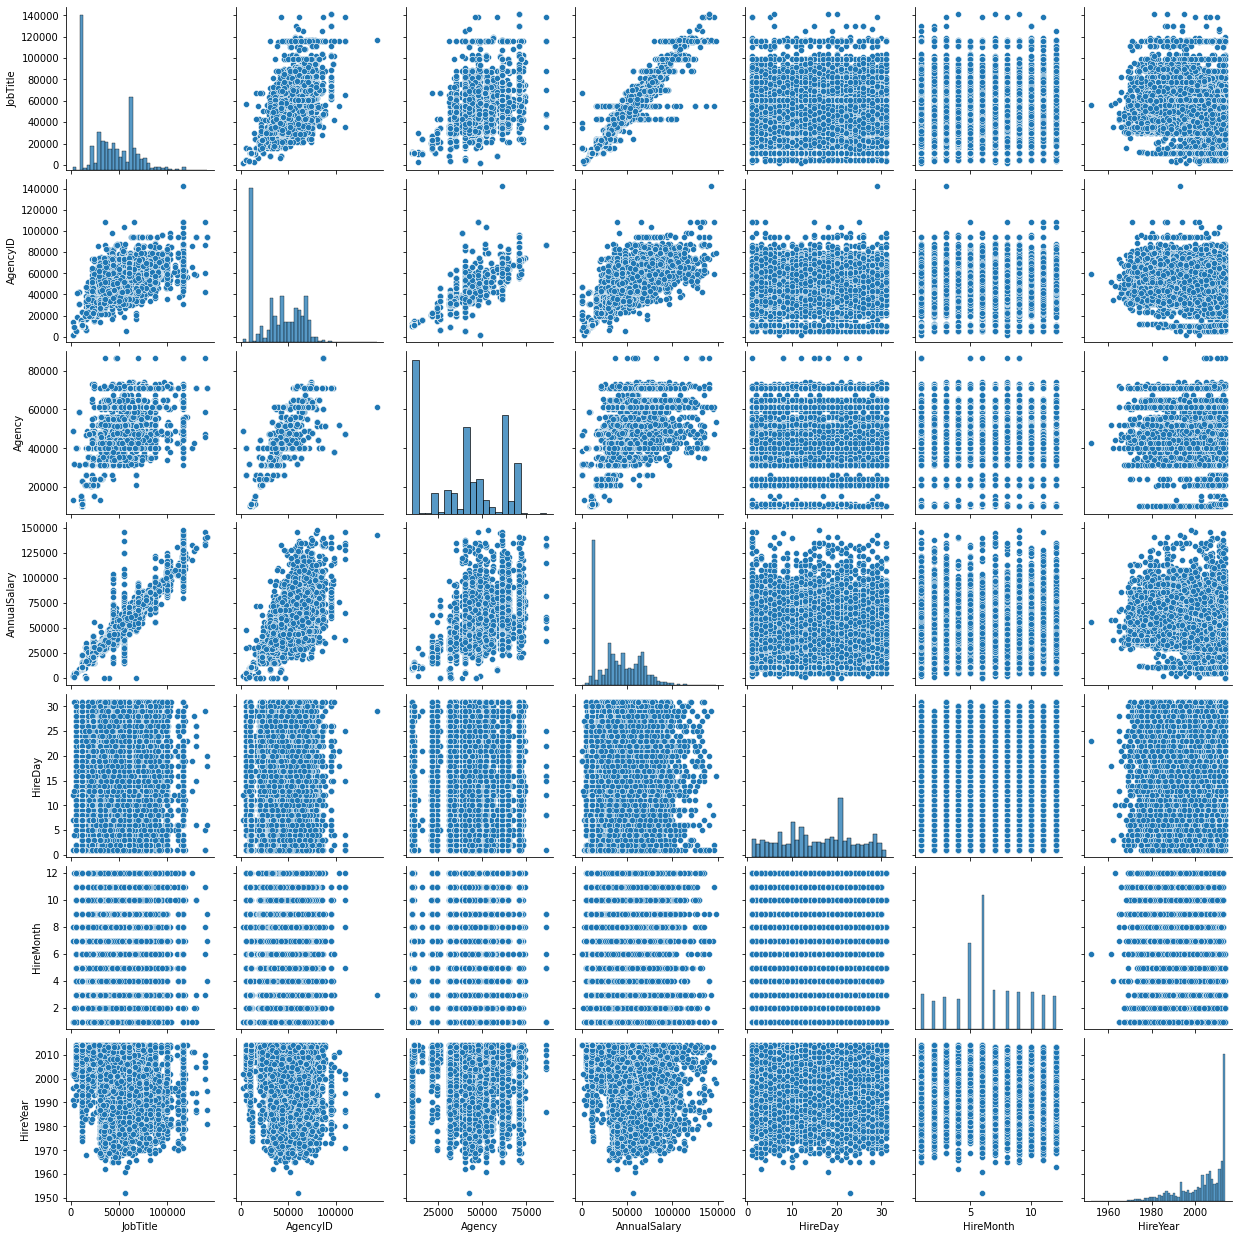

In [ ]:
# Plot a pair plot
plt.figure(figsize=(25,20))
sns.pairplot(salary_master)
plt.show()

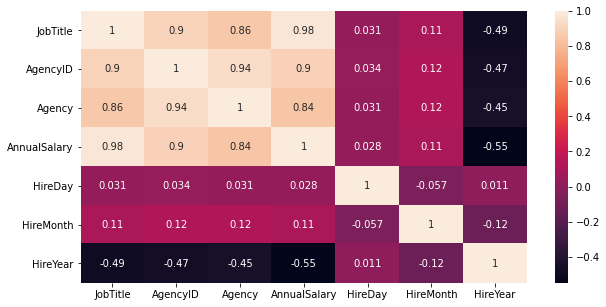

In [ ]:
# Plot a heatMap
plt.figure(figsize=(10,5))
sns.heatmap(salary_master.corr(),annot=True)

### <font face='Cursive'> Train Test Split</font>

#### Split data into train and test set using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
# Split data into train and test sets
salary_train, salary_test = train_test_split(salary_master,train_size=0.7, random_state=42)

 Check sizes of data to know whether they are split correctly

In [ ]:
# Shape of train set
print(salary_train.shape)

# Shape of test set
print(salary_test.shape)

(13226, 7)
(5669, 7)


In [ ]:
salary_train.head()

,JobTitle,AgencyID,Agency,AnnualSalary,HireDay,HireMonth,HireYear
18622,43754.571429,43016.533333,45763.305913,47382.0,7,6,1976
5490,58877.000000,65815.000000,64874.560224,59274.0,8,6,1989
7071,94242.107143,69958.347826,71013.212768,93584.0,30,8,1993
13394,11313.967200,11310.000000,11313.967200,11310.0,12,6,2012
7396,11313.967200,11310.000000,11313.967200,11310.0,7,6,2011


#### <font color=''> Seperate Dependent and Independent Variables using [pop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pop.html)</font>

In [ ]:
# Divide tarin set into Dependent and independent variables
y_train = salary_train.pop('AnnualSalary')

X_train = salary_train


# Divide test set into Dependent and independent variables
y_test = salary_test.pop('AnnualSalary')
#print(salary_test)
X_test = salary_test

print(y_train)
print(X_train)

18622    47382.0
5490     59274.0
7071     93584.0
13394    11310.0
7396     11310.0
          ...   
11363    87229.0
12043    22880.0
5466     11310.0
867      82100.0
15878    11310.0
Name: AnnualSalary, Length: 13226, dtype: float64
           JobTitle      AgencyID        Agency  HireDay  HireMonth  HireYear
18622  43754.571429  43016.533333  45763.305913        7          6      1976
5490   58877.000000  65815.000000  64874.560224        8          6      1989
7071   94242.107143  69958.347826  71013.212768       30          8      1993
13394  11313.967200  11310.000000  11313.967200       12          6      2012
7396   11313.967200  11310.000000  11313.967200        7          6      2011
...             ...           ...           ...      ...        ...       ...
11363  91284.442308  65876.608696  61506.879579       13          2      1999
12043  24202.971014  24515.227273  24202.971014       13          1      2014
5466   11313.967200  11310.000000  11313.967200       12     

### <font color='' face='Cursive'> Scaling</font>
 &nbsp; <font color='' face='cursive'>Scaling is a technique to standardize the independent features present in the data in a fixed range. We do this to make sure all the features are in same scale.</font>
<br><br>
There are two types of scaling
 - Standard Scaling 
 - MinMax Scaling

#### Here we will be using  [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) function of sklearn

In [ ]:
# Scale the train
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_train.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04
mean,3.410750e-16,-2.445580e-16,-3.068769e-16,-1.107999e-16,-4.932039e-17,1.091302e-14
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.539463e+00,-1.685751e+00,-1.397984e+00,-1.766448e+00,-1.833646e+00,-5.029261e+00
25%,-1.158100e+00,-1.267888e+00,-1.346520e+00,-8.105477e-01,-4.721605e-01,-5.883256e-01
50%,-1.476380e-01,8.407664e-02,1.434622e-01,2.586518e-02,-1.317891e-01,2.805530e-01
75%,8.594492e-01,9.050343e-01,1.046531e+00,7.427905e-01,8.893253e-01,8.598055e-01
max,4.147233e+00,4.629334e+00,2.237763e+00,1.818178e+00,1.910440e+00,9.563475e-01


In [ ]:
X_train

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
18622,0.170193,0.155207,0.295924,-1.049523,-0.131789,-2.712251
5490,0.789386,1.178479,1.207092,-0.930035,-0.131789,-1.457204
7071,2.237423,1.364446,1.499765,1.698691,0.548954,-1.071036
13394,-1.158100,-1.267888,-1.346520,-0.452085,-0.131789,0.763263
7396,-1.158100,-1.267888,-1.346520,-1.049523,-0.131789,0.666721
...,...,...,...,...,...,...
11363,2.116320,1.181244,1.046531,-0.332597,-1.493275,-0.491784
12043,-0.630355,-0.675193,-0.732010,-0.332597,-1.833646,0.956348
5466,-1.158100,-1.267888,-1.346520,-0.452085,-0.131789,0.763263
867,1.384291,1.528265,1.543660,0.981766,-0.131789,0.859805


In [ ]:
# # Scale the test
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

X_test.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,-0.006849,-0.001602,-0.001378,-0.007458,-0.019873,-0.005037
std,0.987928,0.997438,1.003394,1.006810,1.011997,1.010818
min,-1.539463,-1.685751,-1.397984,-1.766448,-1.833646,-4.160382
25%,-1.158100,-1.267888,-1.346520,-0.810548,-0.472161,-0.588326
50%,-0.143918,0.097496,0.143462,0.025865,-0.131789,0.280553
75%,0.859449,0.889358,1.046531,0.742790,0.548954,0.859805
max,4.045484,3.121863,2.237763,1.818178,1.910440,0.956348


### <font color='' face='Cursive'> Model Building</font>

#### We are building a [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model for this project

 &nbsp; <font color='' face='cursive'>Linear regression may be defined as the statistical model that analyzes the linear relationship between a dependent variable with given set of independent variables. This is used for predicting the independent variables based on relationship between dependent and independent variables.<br>
    It is a Supervised Learning Technique i.e., it requires historic data to form a relationship.<br><br>
There are two types of Linear Regression:<br>
    1. Simple Linear Regression<br>
    2. Multiple Linear Regression<br><br>
    1.<u><font face='cursive'>Simple Linear Regression:</font></u> It predicts a response using a single feature. The assumption in Simple Linear Regression is that the two variables are linearly related.<br>
    <center><font>   h(xi)=b<sub>0</sub> + b<sub>1</sub>.x<sub>i1</sub><br></font></center>
    2.<u><font face='cursive'>Multiple Linear Regression:</font></u>It is the extension of simple linear regression that predicts a response using two or more features. Mathematically we can explain it as follows −

Consider a dataset having n observations, p features i.e. independent variables and y as one response i.e. dependent variable the regression line for p features can be calculated as follows −
    <center> <font >  h(xi)=b<sub>0</sub> + b<sub>1</sub>.x<sub>i1</sub>+ b<sub>2</sub>.x<sub>i2</sub> +..........+ b<sub>p</sub>.x<sub>ip</sub><br></font></center>
   
Here, h(xi) is the predicted response value and b0,b1,b2…,bp are the regression coefficients.

#### Let's see how a Linear Regression Works

In [ ]:
# A sample Data Frame
example_df = pd.DataFrame({'Performance' : [1,2,3,4,5,6], 'Grade':[2,5,4,6,1,3],'Target':[100,300,200,600,200,600]})
example_df

,Performance,Grade,Target
0,1,2,100
1,2,5,300
2,3,4,200
3,4,6,600
4,5,1,200
5,6,3,600


<font color='' face='Cursive'>Let's take an example Salary prediction for hiring employees, and the salary that would be offered is the Target based on independent variables Performance which is performance in the interview and Grade being the Job Grade thaey are being hired for.</font>

<font color='' face='Cursive'>As discussed Earlier, we have to find relationship between the dependent and independent variables, which is quite easy as we have packages to do the same. Lets build a model to predict Salaries.</font>

In [ ]:
# Create a model by creating a Linear Regression Object
example_lr = LinearRegression()

example_model = example_lr.fit(example_df[['Performance','Grade']],example_df['Target'])

<font color='' face='Cursive'>Now that the model is built let us check the coefficients and Intercept</font>

In [ ]:
# Lets have a look at coefficients as described
print(example_lr.coef_)
print(example_lr.intercept_)

[85. 75.]
-226.66666666666669


<font color='' face='Cursive'> It is now understood that the model is generated and its equation can be defined as </font>
   <font color='' face='Cursive'> -226.667 + 85*Performance + 75 * Grade </font>

<font color='' face='Cursive'> But how well/ accurate is the predicted values of the model. For any Linear regression model, we generally use R<sup>2</sup> to find the same</font>

<u><font color='' face='cursive'>R-squared</font></u> <font color='' face='Cursive'>R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.So we haave to [calculate R-Squared](https://www.k2analytics.co.in/r-squared-in-linear-regression/) for the same<br></font>

<font color='' face='Cursive'> However this made easy by sklearn and can be calculated as below </font>

In [ ]:
# Calculate R-squared
example_model.score(example_df[['Performance','Grade']],example_df['Target'])

0.8271428571428572

<font color='' face='Cursive'> So the model we created is able to predict the results with an accuracy of 82%</font>

<font color='' face='Cursive'> But that's not all.. we have to verify if our model satisfies  [assumptions of Linear Regression](https://blog.uwgb.edu/bansalg/statistics-data-analytics/linear-regression/what-are-the-four-assumptions-of-linear-regression/).</font>

0     91.666667
1    -18.333333
2   -128.333333
3     36.666667
4    -73.333333
5     91.666667
Name: Target, dtype: float64


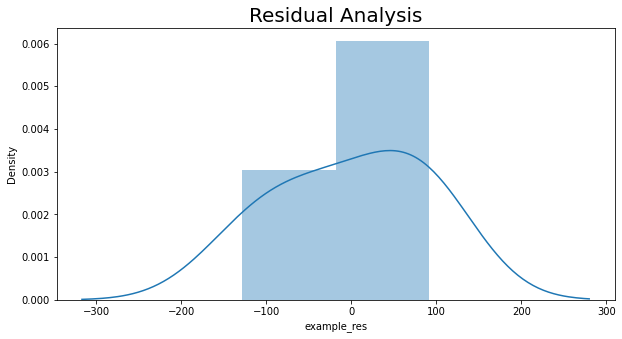

In [ ]:
# Plot Distribution plot of Residuals
plt.figure(figsize=(10,5))
target_pred = example_model.predict(example_df[['Performance','Grade']])
example_res = example_df['Target'] - target_pred
print(example_res)
sns.distplot(example_res)
plt.xlabel('example_res')
plt.title("Residual Analysis",fontsize=20)
plt.show()

As can be seen Error Terms are Normally Distributed

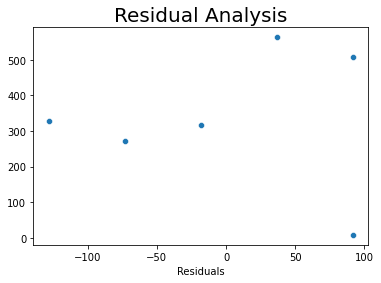

In [ ]:
sns.scatterplot(x=example_res,y=target_pred)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

And there is no specific relation and are independent of each other

##### <font color='' face='Cursive'> Lets use the same to build our Model</font>

#### Generate a Linear Regression model by passing the X_train and y_train as inputs

In [ ]:
# Build the model
lr = LinearRegression()

salary_reg = lr.fit(X_train,y_train)

Let us check the R-squared

In [ ]:
# Verify the r2 score
salary_reg.score(X_train,y_train)

0.964833881870778

##### <font color='' face='Cursive'> We got a very high value for R-squared which is very close to 1, which means the independent variables are able to expalin 96% of  variance in the dependent variable.</font>

### <font color='' face='Cursive'> Model Evaluation</font>

##### <font color='' face='Cursive'> Even though our model performs well on train data, that doesn't mean the model is a good model. The model should perform equally good on the test data as well, i.e., data the model has not encountered till now.</font>

##### <font color='' face='Cursive'> So lets check how model performs on test data</font>

In [ ]:
# r2 for test data
salary_reg.score(X_test,y_test)

0.9634621082754347

##### <font color='' face='Cursive'> The model performs well on the test data as well giving an R-squared of 0.963, which indicates the model generated is a good model and can be used for predicting the Salaries of Employees in Baltimore</font>

##### <font color='' face='Cursive'><u> Note: </u></font> 
- <font color='' face='Cursive'> Here we did not face any issue of [Overfitting](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/) even though we used all the columns. But in most models using all the columns will lead to Overfitting, which can be addressed by [Regularization](https://medium.com/analytics-vidhya/lasso-and-ridge-the-regularized-linear-regression-2d85384badf3).</font>


#### Let's plot distribution plot to check whether Residuals satisfy [assumptions of Linear Regression](https://blog.uwgb.edu/bansalg/statistics-data-analytics/linear-regression/what-are-the-four-assumptions-of-linear-regression/)

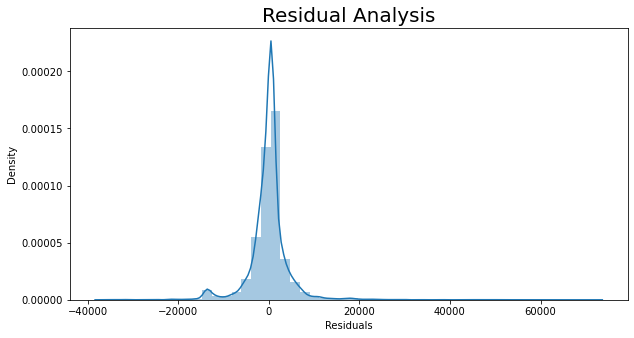

In [ ]:
# Plot Distribution plot of Residuals
plt.figure(figsize=(10,5))
y_train_pred = salary_reg.predict(X_train)
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

 - The Residual terms are normally distributed with mean at 0, which is one of the Assumption of Linear Regression

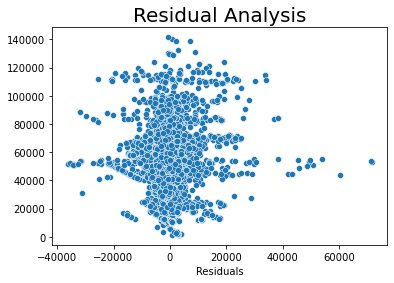

In [ ]:
sns.scatterplot(x=res,y=y_train_pred)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

 - The Residuals are independent of each other ,which is another assumption in Linear Regression

##### <font color='' face='Cursive'> The model has generated can be used for Salary prediction .Let us check the coefficients and intercept </font>

In [ ]:
# Print coef
print("Coef are:",salary_reg.coef_)

#print intercept
print("Intercept is",salary_reg.intercept_)

Coef are: [22395.65357851  2798.67752824 -1694.55993659   -22.59156434
   -62.65873076 -2049.21601256]
Intercept is 39628.221303493134


##### <font color='' face='Cursive'> Let us create a model equation and store it in a string</font>

In [ ]:
model = str(salary_reg.intercept_)

for i in range(len(salary_reg.coef_)):
    model = model +' + '  +(str(salary_reg.coef_[i])) + ' * ' +(str(X_train.columns[i]))
print(model)

39628.221303493134 + 22395.65357851075 * JobTitle + 2798.6775282355734 * AgencyID + -1694.5599365882206 * Agency + -22.591564342892955 * HireDay + -62.65873075557645 * HireMonth + -2049.216012557781 * HireYear


#### <i><font color='' face='Cursive'>Observations from Model:</font></i>
 - Of all the features given  AgencyID,JobTitle and HireYear are the major driver for expaining the variance of Annual Salary as they have higher coefficient value.
 - Out of the above features, Hire Year is negatively related to Annual Salary which is same as we have seen while performing EDA.